# SuperStripe: Color Analysis Examples
* __Parametric Difference Equation imaging methods__ _in the context of the Escape Time Algorithm_
    * grayscale
    * map directly to HSV
    * color-map to RGB
    
#### Equation Definition Code:

In [1]:
""" get the external code files"""
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp

""" known parameter sets  """

X = np.array([  [0.100912725972],
                [1.205224258346],
                [1.182135337901],
                [3.205390422088],
                [2.954561167982],
                [2.786668802221],
                [2.331163860703],
                [0.837620336084],
                [3.261588845910]])

print('X.shape:', X.shape)
""" define the equation """
def SuperStripe(Z, p, Z0=None, ET=None):
    """ 
    Args:
        Z:    a real or complex number
        p:    a real of complex number
    Returns:
        Z:    the result (complex)
    """
#     Z = Z^(2*Z^(2*x^(-2*Z^-x)));
    Z = Z**(2*Z**(2*x**(-2*Z**(-x))))
    return Z

X.shape: (9, 1)


In [2]:
# MATLAB numerical equivalence check
x = X[4]
Z0 = 1 + 1j
Z = SuperStripe(Z0, x, Z0=None, ET=None)
print(Z)
print(x)

[ 0.32986021-0.3812712j]
[ 2.95456117]


# Products of Escape Time Algorithm
* ET, Z, Z0 = get_primitives( [ (function-name, function-parameters ) ], complex_plane_definition)
    * Z0  = initial complex vector at each point (on the complex plane == the input image)
    * ET  = Escape Time at each point
    * Z   = final complex vector at each point

In [3]:
""" Define a complex plane point for each pixel """
par_set = {'n_rows': 500, 'n_cols': 700}
par_set['center_point'] = 0.0 + 0.0*1j
par_set['theta'] = 0 # 
par_set['zoom'] = 1/3

par_set['it_max'] = 64
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

x = X[4]
""" Define the function handle and numerical parameter set """
list_tuple = [(SuperStripe, (x))]
t0 = time.time()

""" Get the primitive products of the calculation """
ET_sm, Z_sm, Z0_sm = ig.get_primitives(list_tuple, par_set)
print(time.time() - t0, '\t calculate primitives total time')

11.011044025421143 	 calculate primitives total time


# Normalized number planes for use as image color values
* Zd, Zr, ETn = etg_norm(Z0, Z, ET)
    * Zd  = distance at ET
    * Zr  = rotation at ET
    * ETn = ET

In [4]:
""" Normalize """
t0 = time.time()
Zd_sm, Zr_sm, ETn_sm = ncp.etg_norm(Z0_sm, Z_sm, ET_sm)
print(time.time() - t0, '\t normalize primitives to color values')

0.822329044342041 	 normalize primitives to color values


# Grayscale
* D = mat_to_gray(Zd, max_v=255, min_v=64)
    * normalized number plane
    * (optional) grascale parameters

1.9845349788665771 	 grayscale converstion time


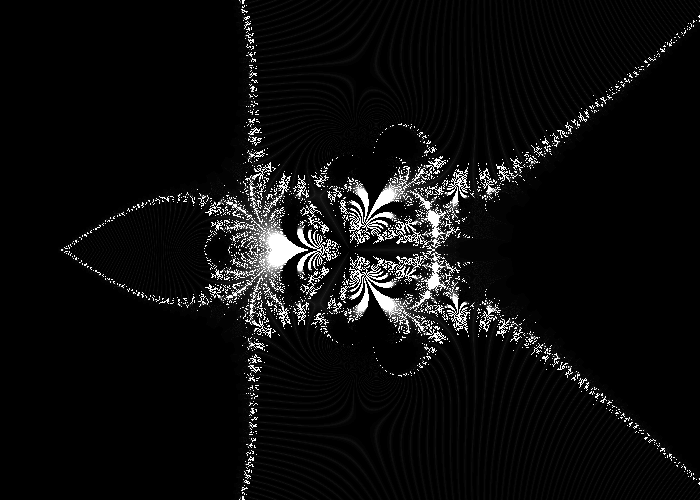

In [5]:
""" Number of iterations for each Vector at Escape Time as a full range grayscale  """
t0 = time.time()
ETd = ncp.mat_to_gray(ETn_sm)
print(time.time() - t0, '\t grayscale converstion time')
display(ETd)

2.2581279277801514 	 grayscale converstion time


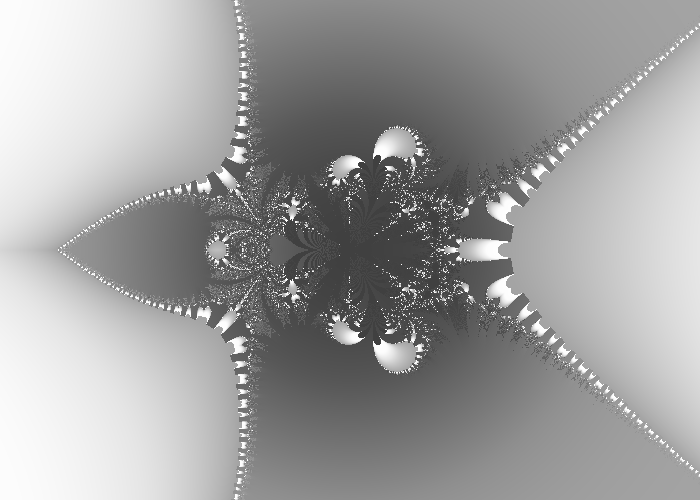

In [6]:
""" Vector Distance at Escape Time as a full range grayscale  """
t0 = time.time()
D = ncp.mat_to_gray(Zd_sm, max_v=255, min_v=64)
print(time.time() - t0, '\t grayscale converstion time')
display(D)

2.2637391090393066 	 grayscale converstion time


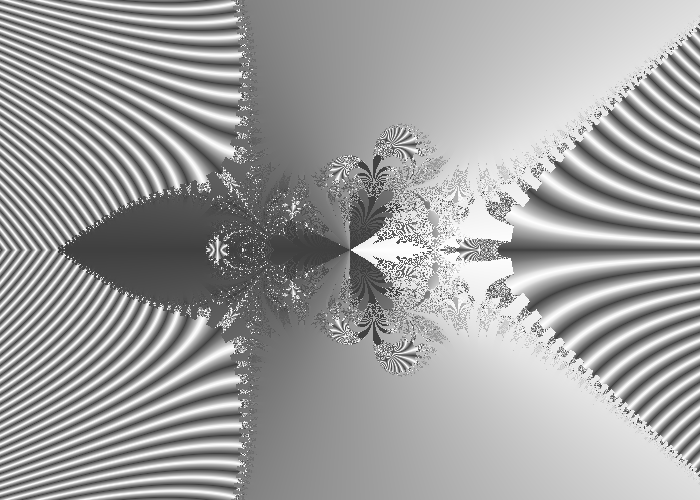

In [7]:
""" Vector Rotation at Escape Time as a full range grayscale  """
t0 = time.time()
R = ncp.mat_to_gray(Zr_sm, max_v=255, min_v=64)
print(time.time() - t0, '\t grayscale converstion time')
display(R)

# Hue Saturation Value: HSV direct
* Ihsv = rgb_2_hsv_mat(H, S, V)
    * H = ncp.range_norm(Zr - Zd, lo=0.5, hi=0.85)
    * S = ncp.range_norm(1 - ETn, lo=0.0, hi=0.9)
    * V = ncp.range_norm(ETn, lo=0.0, hi=1.0)

4.834950923919678 	 HSV converstion time


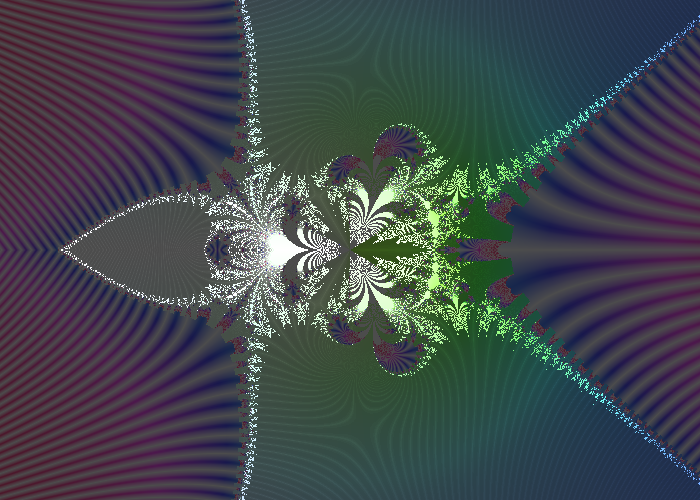

In [8]:
""" number one of two functions 
    (both examples using Distance, Rotation and ET as H,S,V) """
t0 = time.time()
H = ncp.range_norm(Zd_sm, lo=0.25, hi=0.95)
S = ncp.range_norm(Zr_sm, lo=0.0, hi=0.7)
V = ncp.range_norm(ETn_sm, lo=0.3, hi=1.0)
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print(time.time() - t0, '\t HSV converstion time')
display(Ihsv)

4.978803873062134 	 HSV converstion time


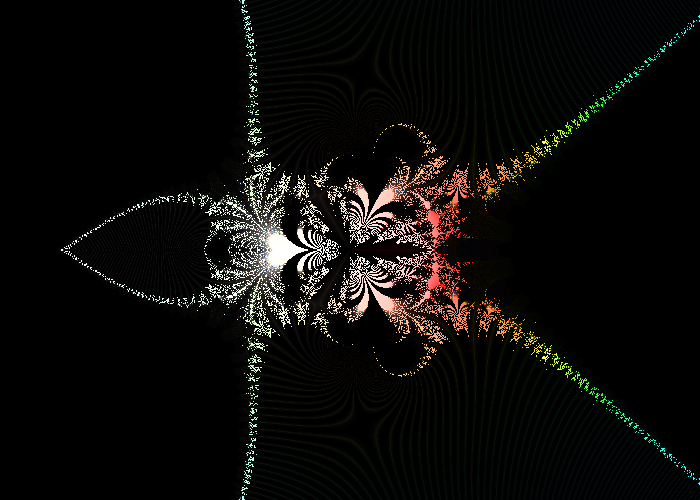

In [9]:
""" number 2 of two functions
    (using using Distance, Rotation and ET as full range H, S, V) """
t0 = time.time()
H2 = ncp.range_norm(Zd_sm)
S2 = ncp.range_norm(Zr_sm)
V2 = ncp.range_norm(ETn_sm)
I_hsv2 = ncp.normat_hsv_intrgb(H2, S2, V2, H_max=1.0, H_min=0.0, S_max=1.0, S_min=0.0, V_max=1.0, V_min=0.0)
print(time.time() - t0, '\t HSV converstion time')
display(I_hsv2)

# Color-mapped
* I_mapped = mat_to_mapped(Zd, mp)
    * Zd converted to index of unique values
    * mp will be resized to number of unique values in Zd

1.8394250869750977 	 HSV converstion time


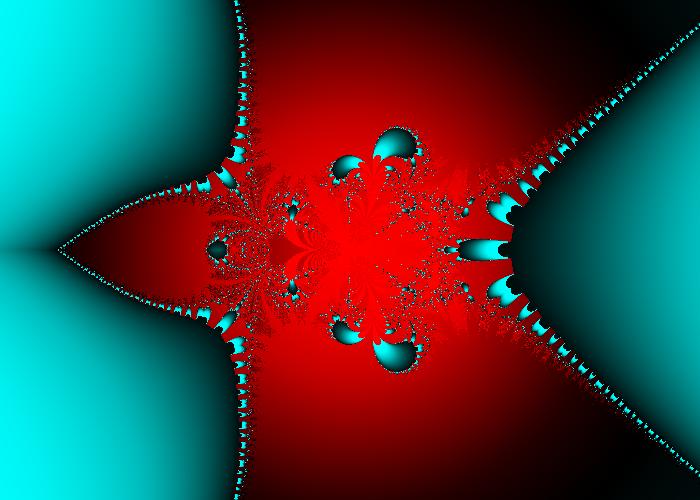

In [10]:
""" Color map example: Red to Black to Blue-Green """
t0 = time.time()
mp = np.array([[1.0, 0.0, 0.0],[0.0, 0.0, 0.0],[0.0, 1.0, 1.0]])
I_rgb = ncp.mat_to_mapped(Zd_sm, mp)
print(time.time() - t0, '\t HSV converstion time')
display(I_rgb)

## Interesting numerical factoid section:

ET =	 2


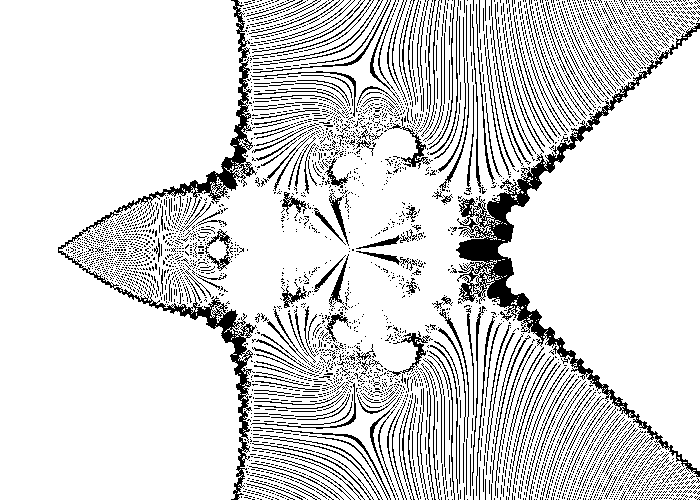

ET =	 3


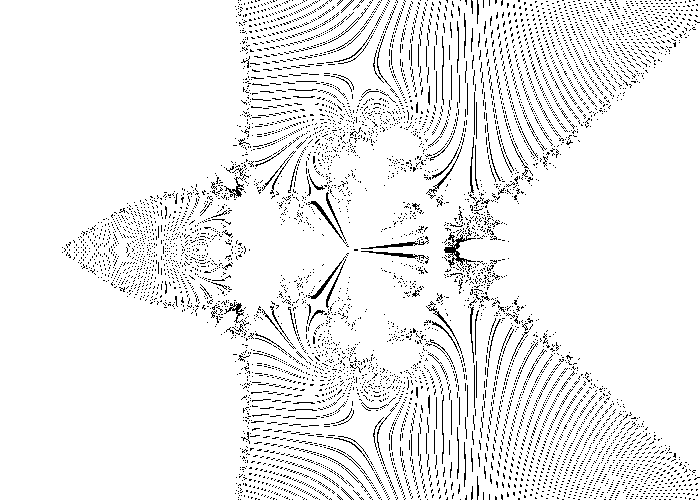

ET =	 4


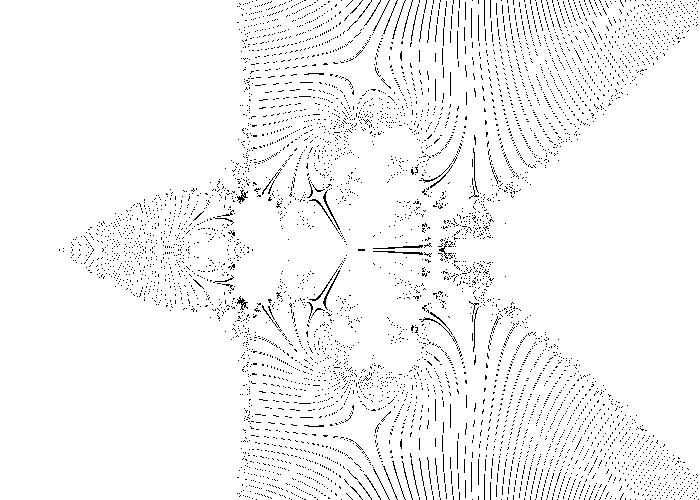

ET =	 5


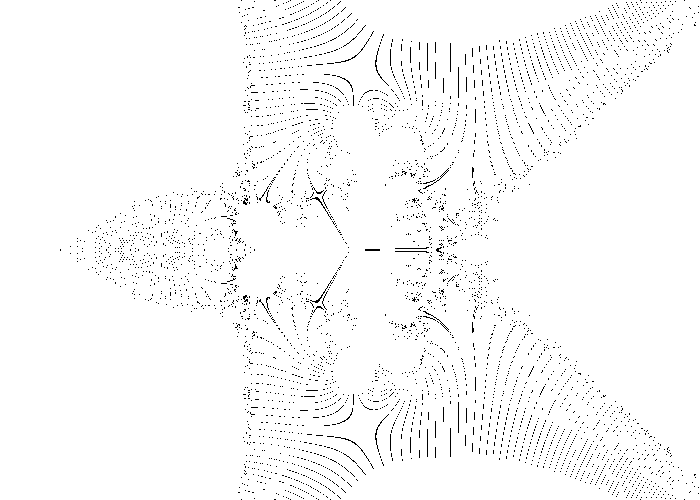

ET =	 6


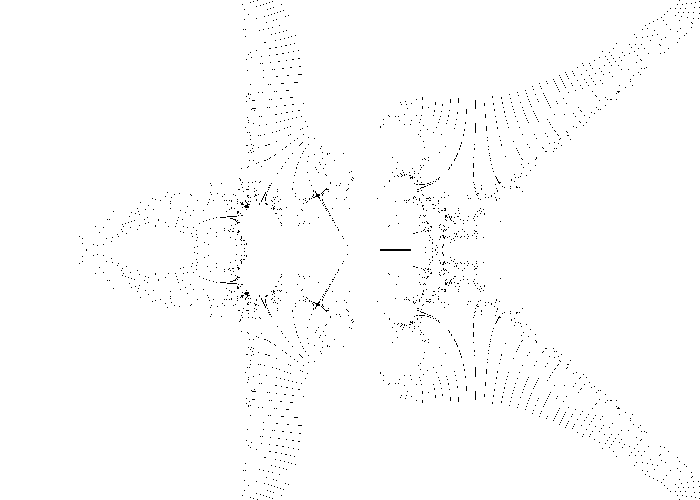

ET =	 7


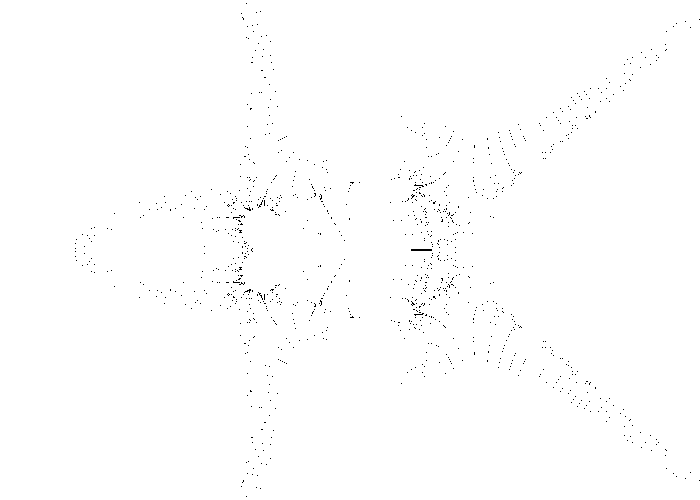

ET >	 8


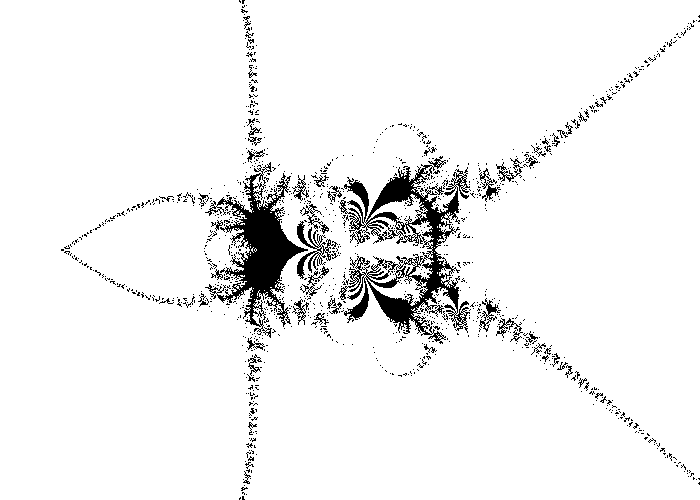

In [11]:
"""  Time-Point of Escape individual escape time points for each escape time
     Animations possible  """
lo_ET = 2
hi_ET = lo_ET + 6
for t in range(lo_ET, hi_ET):
    print('ET =\t',t)
    I = np.ones(ET_sm.shape)
    I[ET_sm == t] = 0
    display(ncp.mat_to_gray(I))
I = np.ones(ET_sm.shape)
I[ET_sm > hi_ET] = 0
print('ET >\t',hi_ET)
display(ncp.mat_to_gray(I))

In [12]:
"""  number of points escaped at each iteration: escape time frequency  """
Total_Points = ET_sm.shape[0] * ET_sm.shape[1]
print('\t\t%i remain in orbit after %i iterations\n'%((ET_sm > (ET_sm.max()-1)).sum(),  ET_sm.max()))
print('%3s) %10s\n'%('ET', 'Escaped'))
t_esc = 0
for k in range(1,int(ET_sm.max())):
    print('%3i) %7i'%(k, (ET_sm == k).sum()))
    t_esc += (ET_sm == k).sum()

print('\n(in)Sanity check:\n%i Total points\n%i Escaped\n%i Remain'%(Total_Points, t_esc, Total_Points - t_esc))

		14542 remain in orbit after 65 iterations

 ET)    Escaped

  1)  226776
  2)   52720
  3)   23750
  4)   13450
  5)    7624
  6)    3110
  7)    1478
  8)     932
  9)     622
 10)     470
 11)     422
 12)     342
 13)     330
 14)     302
 15)     248
 16)     182
 17)     200
 18)     176
 19)     176
 20)     126
 21)     126
 22)     122
 23)     102
 24)     130
 25)      84
 26)     102
 27)      82
 28)      74
 29)      64
 30)      48
 31)      54
 32)      66
 33)      52
 34)      68
 35)      56
 36)      44
 37)      46
 38)      64
 39)      46
 40)      39
 41)      32
 42)      32
 43)      42
 44)      28
 45)      29
 46)      46
 47)      28
 48)      28
 49)      24
 50)      28
 51)      28
 52)      30
 53)      24
 54)      37
 55)      13
 56)      15
 57)      13
 58)       6
 59)      16
 60)      14
 61)      10
 62)      12
 63)       6
 64)      12

(in)Sanity check:
350000 Total points
335458 Escaped
14542 Remain


In [13]:
""" partial list of unescaped starting points (look for orbit points) """
Z_overs = Z0_sm[ET_sm == ET_sm.max()]

v1 = Z_overs[0]
d = '%0.2f'%(np.abs(v1))
theta = '%0.1f'%(180*np.arctan2(np.imag(v1), np.real(v1))/np.pi)
print('Unescaped Vector:\n\tV = ', d, theta, 'degrees\n')

print('%9d'%Z_overs.size, 'total unescaped points\n')
print('%9s'%('points'), 'near V', '      (plane units)')
for denom0 in range(1,12):
    neighbor_distance = np.abs(v1) * 1/denom0
    v1_list = Z_overs[np.abs(Z_overs-v1) < neighbor_distance]
    print('%9d'%len(v1_list), 'within V/%2d  (%0.3f)'%(denom0, neighbor_distance))

Unescaped Vector:
	V =  3.28 113.9 degrees

    14542 total unescaped points

   points near V       (plane units)
     5817 within V/ 1  (3.281)
      322 within V/ 2  (1.640)
      205 within V/ 3  (1.094)
      154 within V/ 4  (0.820)
      125 within V/ 5  (0.656)
      106 within V/ 6  (0.547)
       89 within V/ 7  (0.469)
       73 within V/ 8  (0.410)
       66 within V/ 9  (0.365)
       58 within V/10  (0.328)
       49 within V/11  (0.298)
